In [280]:
import pandas as pd
import numpy as np

#Visualization#
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns 

#modeling
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor



In [281]:
df=pd.read_csv("train.csv")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [283]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [284]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [285]:
df=df.drop(["Id","MSZoning","ScreenPorch","PoolArea","BldgType","SaleCondition","SaleType","MiscVal","3SsnPorch","Alley","EnclosedPorch","OpenPorchSF","WoodDeckSF","PavedDrive","PoolQC","MiscFeature","GarageCond","Fence","Utilities","RoofMatl","MasVnrArea","GarageQual","ExterCond","BsmtCond","BsmtFinSF1","Functional","KitchenAbvGr","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","Heating","BsmtHalfBath","CentralAir","LowQualFinSF","Electrical","2ndFlrSF"],axis=1)

degeri fazla carpik olan sutunlari cikardim

In [286]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   Street        1460 non-null   object 
 4   LotShape      1460 non-null   object 
 5   LandContour   1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   LandSlope     1460 non-null   object 
 8   Neighborhood  1460 non-null   object 
 9   Condition1    1460 non-null   object 
 10  Condition2    1460 non-null   object 
 11  HouseStyle    1460 non-null   object 
 12  OverallQual   1460 non-null   int64  
 13  OverallCond   1460 non-null   int64  
 14  YearBuilt     1460 non-null   int64  
 15  YearRemodAdd  1460 non-null   int64  
 16  RoofStyle     1460 non-null   object 
 17  Exterior1st   1460 non-null   object 
 18  Exterior2nd   1460 non-null 

In [287]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,...,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,438.705324,386.587738,525.480383,...,0.502885,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,...,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,...,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,...,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,...,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,...,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


In [288]:
msSubClass=df["MSSubClass"].value_counts().sort_values(ascending=False)
msSubClass

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [289]:
fig=px.bar(
    df,
    x=msSubClass.index.astype(str),
    y=msSubClass.values,
    color=msSubClass.values,
    text=msSubClass.values,
    color_continuous_scale="YlOrBr"
)

fig.update_layout(
    template="plotly_dark"
)
fig.show()
    

In [290]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [291]:
df.groupby("FullBath")["SalePrice"].mean()

FullBath
0    165200.888889
1    134751.440000
2    213009.825521
3    347822.909091
Name: SalePrice, dtype: float64

In [292]:
data=pd.DataFrame({"fullBath":df.loc[:,"FullBath"],"halfBath":df.loc[:,"HalfBath"],"salePrice":df.loc[:,"SalePrice"]})

In [293]:
data

,fullBath,halfBath,salePrice
0,2,1,208500
1,2,0,181500
2,2,1,223500
3,1,0,140000
4,2,1,250000
...,...,...,...
1455,2,1,175000
1456,2,0,210000
1457,2,0,266500
1458,1,0,142125


In [294]:
def sumBath():
    fullBath=[]
    halfBath=[]
    BsmtFullBath=[]
    for x in df["FullBath"]:
        fullBath.append(x)
    for x in df["HalfBath"]:
        halfBath.append(x)
    for x in df["BsmtFullBath"]:
        BsmtFullBath.append(x)
    for x in range(1460):
        df.at[x,'sumBath']=halfBath[x]+fullBath[x]+ BsmtFullBath[x]
    

In [295]:
sumBath()
df=df.drop(["HalfBath","FullBath","BsmtFullBath"],axis=1)


barthroomu bir sutun haline getirdim fazla sutunlari cikardim


In [296]:
df["GarageFinish"].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [297]:
data2=pd.DataFrame({"GarageType":df.loc[:,"GarageType"],"GarageYrBlt":df.loc[:,"GarageYrBlt"],"GarageFinish":df.loc[:,"GarageFinish"],"GarageCars":df.loc[:,"GarageCars"],"GarageArea":df.loc[:,"GarageArea"],"salePrice":df.loc[:,"SalePrice"]})

In [298]:
data2

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,salePrice
0,Attchd,2003.0,RFn,2,548,208500
1,Attchd,1976.0,RFn,2,460,181500
2,Attchd,2001.0,RFn,2,608,223500
3,Detchd,1998.0,Unf,3,642,140000
4,Attchd,2000.0,RFn,3,836,250000
...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,175000
1456,Attchd,1978.0,Unf,2,500,210000
1457,Attchd,1941.0,RFn,1,252,266500
1458,Attchd,1950.0,Unf,1,240,142125


In [299]:
GarageType=df.groupby("GarageType")["SalePrice"].mean().sort_values(ascending=False)
GarageYrBlt=df.groupby("GarageYrBlt")["SalePrice"].mean().sort_values(ascending=False)
GarageFinish=df.groupby("GarageFinish")["SalePrice"].mean().sort_values(ascending=False)
GarageCars=df.groupby("GarageCars")["SalePrice"].mean().sort_values(ascending=False)
GarageArea=df.groupby("GarageArea")["SalePrice"].mean().sort_values(ascending=False)

fig=make_subplots(rows=6,cols=2)
fig.add_trace(go.Bar(x=GarageType.index,name="GarageArea",y=GarageType.values,marker_color="white"),row=1,col=1)
fig.add_trace(go.Bar(x=GarageYrBlt.index.to_list(),name="GarageYrBlt",y=GarageYrBlt.values,marker_color="white"),row=1,col=2)
fig.add_trace(go.Bar(x=GarageFinish.index,name="GarageFinish",y=GarageFinish.values,marker_color="white"),row=4,col=1)
fig.add_trace(go.Bar(x=GarageCars.index,name="GarageCars",y=GarageCars.values,marker_color="white"),row=4,col=2)
fig.add_trace(go.Bar(x=GarageArea.index,name="GarageArea",y=GarageArea.values,marker_color="white"),row=6,col=1)

fig.update_layout(
    template="plotly_dark"
)
fig.show()


garaji bir tane sutun haline getirmeye calistim ama hepinin ayri bir onemi var


In [300]:
KitchenQual=df.groupby("KitchenQual")["SalePrice"].mean().sort_values(ascending=False)

In [301]:
fig=px.bar(
    x=KitchenQual.index,
    y=KitchenQual.values,
    color_continuous_scale="BuPu",
    color=KitchenQual.values,
    text=np.round(KitchenQual.values,2)
)

fig.update_layout(
    title="Kitchen Qual And Salary",
    template="plotly_dark"
)

fig.show()

In [302]:
df=df.drop("BedroomAbvGr",axis=1)

yatak odasi sayisi fazlaligi azligi bir sey ifade etmiyor diye dusunuyorum


In [303]:
TotRmsAbvGrd=df.groupby("TotRmsAbvGrd")["SalePrice"].mean().sort_values(ascending=False)

In [304]:
fig=px.bar(
    x=TotRmsAbvGrd.index,
    y=TotRmsAbvGrd.values,
    color_continuous_scale="BuPu",
    color=TotRmsAbvGrd.values,
    text=np.round(TotRmsAbvGrd.values,2)
)

fig.update_layout(
    title="TotRmsAbvGrd And Salary",
    template="plotly_dark"
)

fig.show()

In [305]:
firstFlrSF=df.groupby("1stFlrSF")["SalePrice"].mean().sort_index(ascending=False)

In [306]:
fig=px.bar(
    x=firstFlrSF.index.astype(str),
    y=firstFlrSF.values,
    color_continuous_scale="BuPu",
    color=firstFlrSF.index,
    text=np.round(firstFlrSF.values,2)
)

fig.update_layout(
    title="firstFlrSF And Salary",
    template="plotly_dark"
)

fig.show()

In [307]:
GrLivArea=df.groupby("GrLivArea")["SalePrice"].mean().sort_index(ascending=False)

In [308]:
fig=px.bar(
    x=GrLivArea.index.astype(str),
    y=GrLivArea.values,
    color_continuous_scale="BuPu",
    color=GrLivArea.values,
    text=np.round(GrLivArea.values,2)
)

fig.update_layout(
    title="GrLivArea And Salary",
    template="plotly_dark"
)

fig.show()

In [309]:
HeatingQC=df.groupby("HeatingQC")["SalePrice"].mean().sort_values(ascending=False)
HeatingQC

HeatingQC
Ex    214914.429150
Gd    156858.871369
TA    142362.876168
Fa    123919.489796
Po     87000.000000
Name: SalePrice, dtype: float64

In [310]:
fig=px.bar(
    x=HeatingQC.index,
    y=HeatingQC.values,
    color_continuous_scale="BuPu",
    color=HeatingQC.values,
    text=np.round(HeatingQC.values,2)
)

fig.update_layout(
    title="HeatingQC And Salary",
    template="plotly_dark"
)

fig.show()

In [311]:
def sumArea():
    TotalBsmtSF=[]
    GrLivArea=[]
    
    for x in df["TotalBsmtSF"]:
        TotalBsmtSF.append(x)
    for x in df["GrLivArea"]:
        GrLivArea.append(x)
    for x in range(1460):
        df.at[x,'sumArea']=TotalBsmtSF[x]+GrLivArea[x]
    

In [312]:
sumArea()

In [313]:
sumArea=df.groupby("sumArea")["SalePrice"].mean().sort_index(ascending=False)
sumArea


sumArea
11752.0    160000.0
7814.0     184750.0
6872.0     745000.0
6760.0     755000.0
6428.0     430000.0
             ...   
845.0       84000.0
827.0      107500.0
728.0       60000.0
720.0       72500.0
334.0       39300.0
Name: SalePrice, Length: 963, dtype: float64

In [314]:
fig=px.bar(df,
    x=sumArea.index.astype(str),
    y=sumArea.values,
    color_continuous_scale="BuPu",
    color=sumArea.values,
    text=np.round(sumArea.values,2)
)

fig.update_layout(
    title="sumArea And Salary",
    template="plotly_dark"
)

fig.show()

In [315]:
len(df.columns)

43

In [316]:
df=df.drop(["GrLivArea","TotalBsmtSF","1stFlrSF"],axis=1)

toplam alani bir sutun haline getirip gereksiz sunulari cikardim

In [317]:
len(df.columns)

40

In [318]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'MoSold', 'YrSold', 'SalePrice', 'sumBath', 'sumArea'],
      dtype='object')

In [319]:
BsmtFinType1andSale=df.groupby("BsmtFinType1")["SalePrice"].mean().sort_values(ascending=False)
BsmtFinType1=df["BsmtFinType1"].value_counts()
BsmtFinType1

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [320]:
fig=make_subplots(rows=1,cols=1)


    


fig.add_trace(go.Bar(x=BsmtFinType1andSale.index,y=BsmtFinType1andSale.values,name="BsmtFinType1 and Sale Price"),row=1,col=1)
fig.update_layout(template="plotly_dark")
fig.show()

In [321]:
BsmtFinType1=df["BsmtFinType1"].value_counts()
BsmtFinType1

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [322]:
colors=["red","oranged","white","blue"]


fig=go.Figure(data=[go.Pie(
    values=BsmtFinType1.values,
    labels=["Unf","GLQ","ALQ","BLQ","Rec","LWQ"],
    textinfo="percent+value",
    marker_colors=colors)])
fig.update_layout(
    title_text="BsmtFinType1",
    template="plotly_dark"
)

fig.show()



In [323]:
BsmtExposure=df["BsmtExposure"].value_counts()
BsmtExposureAndSale=df.groupby("BsmtExposure")["SalePrice"].mean().sort_values(ascending=False)
BsmtExposure

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [324]:
colors=["red","oranged","white","blue"]


fig=go.Figure(data=[go.Pie(
    values=BsmtExposure.values,
    labels=["No","Av","Gd","Mn"],
    textinfo="percent+value",
    marker_colors=colors)])
fig.update_layout(
    title_text="BsmtExposure",
    template="plotly_dark"
)

fig.show()



In [325]:
fig=px.bar(df,
    x=BsmtExposureAndSale.index,
    y=BsmtExposureAndSale.values,
    color_continuous_scale="BuPu",
    color=BsmtExposureAndSale.values,
    text=np.round(BsmtExposureAndSale.values,2)
)

fig.update_layout(
    title="BsmtExposure And Sale Price",
    template="plotly_dark"
)

fig.show()

In [326]:
BsmtQual=df["BsmtQual"].value_counts()
BsmtQualAndSale=df.groupby("BsmtQual")["SalePrice"].mean().sort_values(ascending=False)
BsmtQual

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [327]:
colors=["brown","yellow","white","blue"]


fig=go.Figure(data=[go.Pie(
    values=BsmtQual.values,
    labels=["TA","Gd","Ex","Fa"],
    textinfo="percent+value",
    marker_colors=colors)])
fig.update_layout(
    title_text="BsmtQual",
    template="plotly_dark"
)

fig.show()


In [328]:
fig=px.bar(df,
    x=BsmtQualAndSale.index,
    y=BsmtQualAndSale.values,
    color_continuous_scale="BuPu",
    color=BsmtQualAndSale.values,
    text=np.round(BsmtQualAndSale.values,2)
)

fig.update_layout(
    title="BsmtQual And Sale Price",
    template="plotly_dark"
)

fig.show()

In [329]:
Foundation=df["Foundation"].value_counts()
FoundationAndSale=df.groupby("Foundation")["SalePrice"].mean().sort_values(ascending=False)
Foundation
FoundationAndSaleDf=pd.DataFrame({"Foundation":df["Foundation"].values,"SalePrice":df["SalePrice"].values})
FoundationAndSaleDf

,Foundation,SalePrice
0,PConc,208500
1,CBlock,181500
2,PConc,223500
3,BrkTil,140000
4,PConc,250000
...,...,...
1455,PConc,175000
1456,CBlock,210000
1457,Stone,266500
1458,CBlock,142125


In [330]:
fig=make_subplots(rows=2,cols=2)

fig.add_trace(go.Bar(x=FoundationAndSale.index,y=FoundationAndSale.values,name="Foundation And Sale"),row=1,col=2)

    


fig.add_trace(go.Bar(x=Foundation.index,y=Foundation.values,name="Foundation"),row=1,col=1)

fig.update_layout(template="plotly_dark")
fig.show()

In [331]:
fig=px.box(FoundationAndSaleDf,
    x="Foundation",
    y="SalePrice",
    color='Foundation')

fig.update_layout(
    xaxis=dict(
        title="Foundation"
    ),
    yaxis=dict(
        title="sale Price"
    ),
    template="plotly_dark"
)

fig.show()
    


In [332]:
ExterQual=df["ExterQual"].value_counts()
ExterQualAndSale=df.groupby("ExterQual")["SalePrice"].mean().sort_values(ascending=False)
ExterQual

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [333]:
fig=make_subplots(rows=2,cols=2)

fig.add_trace(go.Bar(x=ExterQualAndSale.index,y=ExterQualAndSale.values,name="ExterQual And Sale"),row=1,col=2)

    


fig.add_trace(go.Bar(x=ExterQual.index,y=ExterQual.values,name="ExterQual"),row=1,col=1)

fig.update_layout(template="plotly_dark")
fig.show()

In [334]:
ExterQualAndSaleDf=pd.DataFrame({"ExterQual":df["ExterQual"].values,"SalePrice":df["SalePrice"].values})
FoundationAndSaleDf

,Foundation,SalePrice
0,PConc,208500
1,CBlock,181500
2,PConc,223500
3,BrkTil,140000
4,PConc,250000
...,...,...
1455,PConc,175000
1456,CBlock,210000
1457,Stone,266500
1458,CBlock,142125


In [335]:
fig=px.box(ExterQualAndSaleDf,
    x="ExterQual",
    y="SalePrice",
    color='ExterQual')

fig.update_layout(
    xaxis=dict(
        title="ExterQual"
    ),
    yaxis=dict(
        title="sale Price"
    ),
    template="plotly_dark"
)

fig.show()

In [336]:
df.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
ExterQual         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
HeatingQC         0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SalePrice         0
sumBath           0
sumArea           0
dtype: int64

In [337]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
object_columns = df.select_dtypes(include="object")

In [338]:
column_means = numeric_columns.mean()
df=df.fillna(column_means)

In [339]:
df.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
ExterQual         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
HeatingQC         0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt       0
GarageFinish     81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SalePrice         0
sumBath           0
sumArea           0
dtype: int64

In [340]:
df=df.drop("MasVnrType",axis=1)
object_columns=object_columns.drop(["MasVnrType","FireplaceQu"],axis=1)
df['FireplaceQu'].fillna('a', inplace=True)

In [341]:
for col in object_columns:
    mode_val = df[col].mode()[0]  
    df[col].fillna(mode_val, inplace=True)

In [342]:
df.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
MoSold          0
YrSold          0
SalePrice       0
sumBath         0
sumArea         0
dtype: int64

<Axes: >

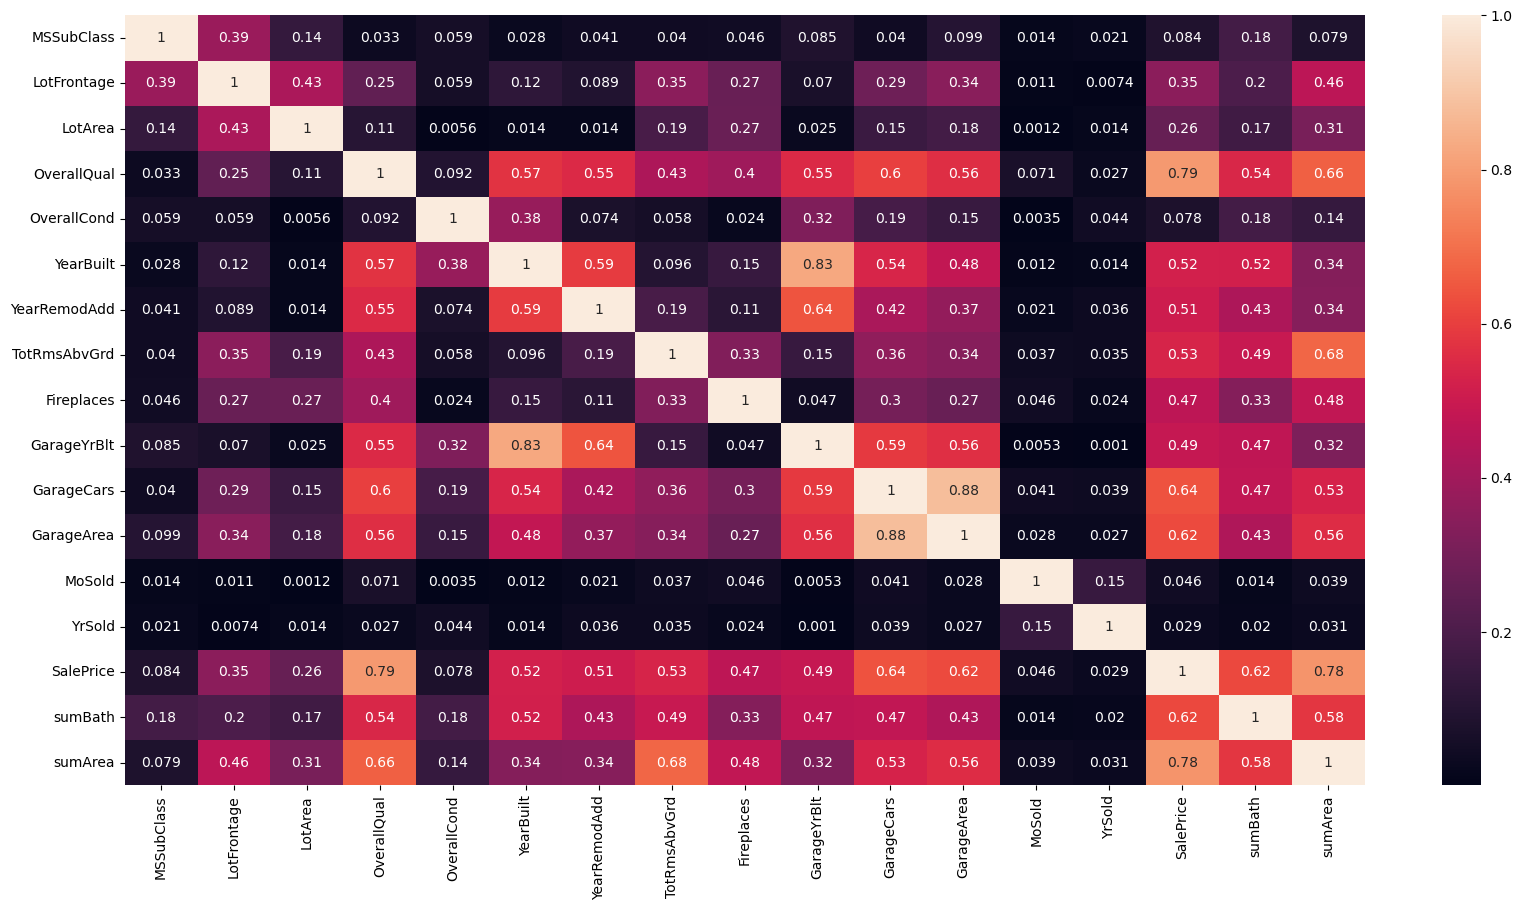

In [343]:
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_columns.corr().abs(),  annot=True)

#    Lineer Regrasyon  

In [345]:
df["MSSubClass"]=np.log1p(df["MSSubClass"])
df["OverallCond"]=np.log1p(df["OverallCond"])
df["MoSold"]=np.log1p(df["MoSold"])
df["YrSold"]=np.log1p(df["YrSold"])





In [346]:
df=df.drop(["FireplaceQu"],axis=1)
train=df.drop("SalePrice",axis=1)
test1=df.loc[:,"SalePrice"]

In [347]:
cevir=LabelEncoder()
for x in object_columns:
    train[x]=cevir.fit_transform(train[x])


In [348]:
test1 = np.log1p(test1)
X_train, X_test, y_train, y_test = train_test_split(train, test1, test_size=0.3, random_state=156)

In [349]:
train

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,sumBath,sumArea
0,1.631370,65.0,8450,1,3,3,4,0,5,2,...,0,1,2003.0,1,2,548,1.098612,7.605392,4.0,2566.0
1,1.397363,80.0,9600,1,3,3,2,0,24,1,...,1,1,1976.0,1,2,460,1.791759,7.604894,2.0,2524.0
2,1.631370,68.0,11250,1,0,3,4,0,5,2,...,1,1,2001.0,1,2,608,2.302585,7.605392,4.0,2706.0
3,1.660640,60.0,9550,1,0,3,0,0,6,2,...,1,5,1998.0,2,3,642,1.098612,7.604396,2.0,2473.0
4,1.631370,84.0,14260,1,0,3,2,0,15,2,...,1,1,2000.0,1,3,836,2.564949,7.605392,4.0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.631370,62.0,7917,1,3,3,4,0,8,2,...,1,1,1999.0,1,2,460,2.197225,7.604894,3.0,2600.0
1456,1.397363,85.0,13175,1,3,3,4,0,14,2,...,2,1,1978.0,2,2,500,1.098612,7.606387,3.0,3615.0
1457,1.660640,66.0,9042,1,3,3,4,0,6,2,...,2,1,1941.0,1,1,252,1.791759,7.606387,2.0,3492.0
1458,1.397363,68.0,9717,1,3,3,4,0,12,2,...,0,1,1950.0,2,1,240,1.609438,7.606387,2.0,2156.0


In [350]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
predict=lr_reg.predict(X_test)
predict

array([11.47599082, 12.08151207, 11.80113557, 12.37114367, 11.68640682,
       12.09365623, 11.9021144 , 11.46929701, 11.84833068, 11.66591198,
       11.53359367, 12.16413207, 11.5486895 , 11.3682858 , 11.90631154,
       12.51865623, 12.04256373, 13.04010181, 11.83915241, 11.67692247,
       12.47387988, 12.78665087, 12.33010832, 12.35238744, 12.15855732,
       12.65211259, 11.92127   , 11.73861011, 11.94429161, 12.24309794,
       12.74371266, 11.65696747, 12.2667556 , 11.74018774, 11.85184203,
       11.49148616, 12.50851479, 11.56253473, 12.23193285, 11.91055656,
       12.65379257, 12.19522307, 12.25953874, 12.56812795, 12.16949063,
       12.07457002, 12.15667542, 12.37994415, 12.71923598, 12.03291386,
       11.99602304, 12.20256712, 12.17196129, 12.18737946, 11.95527041,
       10.92697275, 11.61915501, 11.4934118 , 12.04766398, 12.49441811,
       12.37607739, 11.97479678, 12.14772598, 12.05542657, 11.80636433,
       11.61334178, 11.73676591, 11.97841191, 12.36521486, 12.23

In [351]:
dogrulukOrani=np.sqrt(mean_squared_error(y_test,predict))
dogrulukOrani

0.13675773231324673

In [378]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
predictRidge=ridge_reg.predict(X_test)


In [353]:
dogrulukOrani=np.sqrt(mean_squared_error(y_test,predictRidge))
dogrulukOrani

0.13640792441683242

In [379]:
grid_model = GridSearchCV(ridge_reg, param_grid={'alpha':[0.05, 0.1, 1,2,3,4, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_train,y_train)

best_ridge = grid_model.best_estimator_
print(best_ridge)


Ridge(alpha=1)


In [380]:
ridgeGrid = Ridge(alpha=1)
ridgeGrid.fit(X_train, y_train)
predictRidgeGrid=ridgeGrid.predict(X_test)


In [382]:
dogrulukOraniGrid=np.sqrt(mean_squared_error(y_test,predictRidgeGrid))
dogrulukOraniGrid

0.13640792441683242

In [384]:
tablo=pd.DataFrame({"gercekler":y_test,"tahminler":predictRidgeGrid})
tablo

,gercekler,tahminler
149,11.652696,11.474105
1258,12.154785,12.083781
1223,11.834291,11.800660
474,12.433212,12.369699
239,11.635152,11.702461
...,...,...
435,12.264346,12.323705
900,11.608245,11.572690
273,11.842236,12.002044
786,11.842236,11.746060


In [355]:
test=pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [356]:
Id=test["Id"].values
test=test.drop(["Id","MSZoning","ScreenPorch","PoolArea","BldgType","SaleCondition","SaleType","MiscVal","3SsnPorch","Alley","EnclosedPorch","OpenPorchSF","WoodDeckSF","PavedDrive","PoolQC","MiscFeature","GarageCond","Fence","Utilities","RoofMatl","MasVnrArea","GarageQual","ExterCond","BsmtCond","BsmtFinSF1","Functional","KitchenAbvGr","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","Heating","BsmtHalfBath","CentralAir","LowQualFinSF","Electrical","2ndFlrSF"],axis=1)


In [357]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   LotFrontage   1232 non-null   float64
 2   LotArea       1459 non-null   int64  
 3   Street        1459 non-null   object 
 4   LotShape      1459 non-null   object 
 5   LandContour   1459 non-null   object 
 6   LotConfig     1459 non-null   object 
 7   LandSlope     1459 non-null   object 
 8   Neighborhood  1459 non-null   object 
 9   Condition1    1459 non-null   object 
 10  Condition2    1459 non-null   object 
 11  HouseStyle    1459 non-null   object 
 12  OverallQual   1459 non-null   int64  
 13  OverallCond   1459 non-null   int64  
 14  YearBuilt     1459 non-null   int64  
 15  YearRemodAdd  1459 non-null   int64  
 16  RoofStyle     1459 non-null   object 
 17  Exterior1st   1458 non-null   object 
 18  Exterior2nd   1458 non-null 

In [358]:
def sumBath2():
    fullBath2=[]
    halfBath2=[]
    BsmtFullBath2=[]
    for x in test["FullBath"]:
        fullBath2.append(x)
    for x in test["HalfBath"]:
        halfBath2.append(x)
    for x in test["BsmtFullBath"]:
        BsmtFullBath2.append(x)
    for x in range(1459):
        test.at[x,'sumBath']=halfBath2[x]+fullBath2[x]+ BsmtFullBath2[x]
def sumArea2():
    TotalBsmtSF2=[]
    GrLivArea2=[]
    
    for x in test["TotalBsmtSF"]:
        TotalBsmtSF2.append(x)
    for x in test["GrLivArea"]:
        GrLivArea2.append(x)
    for x in range(1459):
        test.at[x,'sumArea']=TotalBsmtSF2[x]+GrLivArea2[x]
    
    

In [359]:
sumBath2()
test=test.drop(["HalfBath","FullBath","BsmtFullBath"],axis=1)


In [360]:
test=test.drop("BedroomAbvGr",axis=1)

In [361]:
sumArea2()

In [362]:
test=test.drop(["GrLivArea","TotalBsmtSF","1stFlrSF"],axis=1)

In [363]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   LotFrontage   1232 non-null   float64
 2   LotArea       1459 non-null   int64  
 3   Street        1459 non-null   object 
 4   LotShape      1459 non-null   object 
 5   LandContour   1459 non-null   object 
 6   LotConfig     1459 non-null   object 
 7   LandSlope     1459 non-null   object 
 8   Neighborhood  1459 non-null   object 
 9   Condition1    1459 non-null   object 
 10  Condition2    1459 non-null   object 
 11  HouseStyle    1459 non-null   object 
 12  OverallQual   1459 non-null   int64  
 13  OverallCond   1459 non-null   int64  
 14  YearBuilt     1459 non-null   int64  
 15  YearRemodAdd  1459 non-null   int64  
 16  RoofStyle     1459 non-null   object 
 17  Exterior1st   1458 non-null   object 
 18  Exterior2nd   1458 non-null 

In [364]:
numeric_columns2 = test.select_dtypes(include=['int64', 'float64'])
object_columns2 = test.select_dtypes(include="object")

In [365]:
test=test.drop("MasVnrType",axis=1)
object_columns2=object_columns2.drop(["MasVnrType","FireplaceQu"],axis=1)
test['FireplaceQu'].fillna('-', inplace=True)

In [366]:
column_means2 = numeric_columns2.mean()
test=test.fillna(column_means2)

In [367]:
for col in object_columns2:
    mode_val = test[col].mode()[0]  
    test[col].fillna(mode_val, inplace=True)


In [368]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   LotFrontage   1459 non-null   float64
 2   LotArea       1459 non-null   int64  
 3   Street        1459 non-null   object 
 4   LotShape      1459 non-null   object 
 5   LandContour   1459 non-null   object 
 6   LotConfig     1459 non-null   object 
 7   LandSlope     1459 non-null   object 
 8   Neighborhood  1459 non-null   object 
 9   Condition1    1459 non-null   object 
 10  Condition2    1459 non-null   object 
 11  HouseStyle    1459 non-null   object 
 12  OverallQual   1459 non-null   int64  
 13  OverallCond   1459 non-null   int64  
 14  YearBuilt     1459 non-null   int64  
 15  YearRemodAdd  1459 non-null   int64  
 16  RoofStyle     1459 non-null   object 
 17  Exterior1st   1459 non-null   object 
 18  Exterior2nd   1459 non-null 

In [369]:
cevir=LabelEncoder()
for x in object_columns:
    test[x]=cevir.fit_transform(test[x])
test

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,sumBath,sumArea
0,20,80.0,11622,1,3,3,4,0,12,1,...,-,1,1961.000000,2,1.0,730.0,6,2010,1.0,1778.0
1,20,81.0,14267,1,0,3,0,0,12,2,...,-,1,1958.000000,2,1.0,312.0,6,2010,2.0,2658.0
2,60,74.0,13830,1,0,3,4,0,8,2,...,TA,1,1997.000000,0,2.0,482.0,3,2010,3.0,2557.0
3,60,78.0,9978,1,0,3,4,0,8,2,...,Gd,1,1998.000000,0,2.0,470.0,6,2010,3.0,2530.0
4,120,43.0,5005,1,0,1,4,0,22,2,...,-,1,1992.000000,1,2.0,506.0,1,2010,2.0,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,1,3,3,4,0,10,2,...,-,1,1977.721217,2,0.0,0.0,6,2006,2.0,1638.0
1455,160,21.0,1894,1,3,3,4,0,10,2,...,-,4,1970.000000,2,1.0,286.0,4,2006,2.0,1638.0
1456,20,160.0,20000,1,3,3,4,0,11,2,...,TA,5,1960.000000,2,2.0,576.0,9,2006,2.0,2448.0
1457,85,62.0,10441,1,3,3,4,0,11,2,...,-,1,1977.721217,2,0.0,0.0,7,2006,1.0,1882.0


In [371]:
test=test.drop("FireplaceQu",axis=1)

In [372]:
test["MSSubClass"]=np.log1p(test["MSSubClass"])
test["OverallCond"]=np.log1p(test["OverallCond"])
test["MoSold"]=np.log1p(test["MoSold"])
test["YrSold"]=np.log1p(test["YrSold"])



predict2=ridge_reg.predict(test)
predict2

array([11.40545629, 11.68710911, 11.6318358 , ..., 11.77684665,
       11.21639922, 12.0950727 ])

In [373]:
predict2=np.expm1(predict2)

In [374]:
predict2

array([ 89809.42079777, 119026.41298415, 112625.89301813, ...,
       130201.55796235,  74338.611613  , 178986.75960273])

In [375]:
sample_submission2=pd.DataFrame({"Id":Id,"SalePrice":predict2})
sample_submission2

,Id,SalePrice
0,1461,89809.420798
1,1462,119026.412984
2,1463,112625.893018
3,1464,136362.622915
4,1465,117418.972201
...,...,...
1454,2915,57880.722382
1455,2916,58055.896738
1456,2917,130201.557962
1457,2918,74338.611613


In [1623]:
sample_submission2.to_csv('submission.csv', index=False)